### Which MOEA is the Best ?

Algorithms to be considered
* SPEA 2
* NSGA 2
* RNSGA2
* MOEA/D (Chebychev , Weighted sum , Penalty Boundary Intersection)
* NSGA 3

Literature Review:
* papers on all these algorithms (Foundational Papers)
* Test Problems Definitions 
* Evaluation Metrics (Strongly Pareto Compliant and Weakly Pareto Compliant)

In [17]:
from pymoo.util.function_loader import is_compiled;print('Compiled Extensions: ', is_compiled())
import numpy as np
from pymoo.util.plotting import plot

Compiled Extensions:  True


In [18]:
from pymoo.algorithms.moo.spea2 import SPEA2
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.multi.zdt import ZDT3
from pymoo.optimize import minimize
from pymoo.indicators.hv import HV


In [19]:
# Hypervolume of pareto front of problem for n_vars = 2,3,5,10
problem_2 = ZDT3()
original_pareto_front_2 = problem_2.pareto_front()
objective_nvar2_1 = [i[0] for i in original_pareto_front_2]
objective_nvar2_2 = [i[1] for i in original_pareto_front_2]
ref_vector_2 = [max(objective_nvar2_1),max(objective_nvar2_2)]
ind = HV(ref_point=ref_vector_2)
Hypervolume_nvar2 = ind(original_pareto_front_2)


problem_3 = ZDT3()
original_pareto_front_3 = problem_3.pareto_front()
objective_nvar3_1 = [i[0] for i in original_pareto_front_3]
objective_nvar3_2 = [i[1] for i in original_pareto_front_3]
ref_vector_3 = [max(objective_nvar3_1),max(objective_nvar3_2)]
ind = HV(ref_point=ref_vector_3)
Hypervolume_nvar3 = ind(original_pareto_front_3)


problem_5 = ZDT3()
original_pareto_front_5 = problem_5.pareto_front()
objective_nvar5_1 = [i[0] for i in original_pareto_front_5]
objective_nvar5_2 = [i[1] for i in original_pareto_front_5]
ref_vector_5 = [max(objective_nvar5_1),max(objective_nvar5_2)]
ind = HV(ref_point=ref_vector_5)
Hypervolume_nvar5 = ind(original_pareto_front_5)

problem_10 = ZDT3()
original_pareto_front_10 = problem_10.pareto_front()
objective_nvar10_1 = [i[0] for i in original_pareto_front_10]
objective_nvar10_2 = [i[1] for i in original_pareto_front_10]
ref_vector_10 = [max(objective_nvar10_1),max(objective_nvar10_2)]
ind = HV(ref_point=ref_vector_10)
Hypervolume_nvar10 = ind(original_pareto_front_10)

#### SPEA2 nobj = 2 , nvar = 2

In [20]:
model_list = []
problem = ZDT3()
algorithm = SPEA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |      9 |  1.2950925936 |  1.4700248065 |  0.000000E+00 |  2.4180422013 |  2.0893606676
     2 |      200 |     14 |  1.2047002309 |  1.3748106772 |  0.000000E+00 |  2.2677221404 |  2.0081974210
     3 |      300 |     12 |  0.9276299070 |  1.2522005126 |  0.000000E+00 |  2.0610875723 |  1.3258320488
     4 |      400 |     10 |  0.8915860430 |  0.9754623147 |  0.000000E+00 |  1.4928712359 |  1.3097850069
     5 |      500 |     11 |  0.6987419087 |  1.0054573739 |  0.0033038738 |  1.6788581814 |  1.0168274350
     6 |      600 |     14 |  0.6090069142 |  0.8582101036 |  0.0265066733 |  1.4261269883 |  0.9287034951
     7 |      700 |     16 |  0.4839366135 |  0.7002650273 |  0.0524424182 |  1.1125447375 |  0.6559709837
     8 |      800 |     16 |  0.3983035646 |  0.4813567652 |  0.0801898821 |  0.7110077430 |  0.5545740333
     9 |      900 |     16 |  0.36855

In [21]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar2 for i in data_avg_hyp_improvement ]





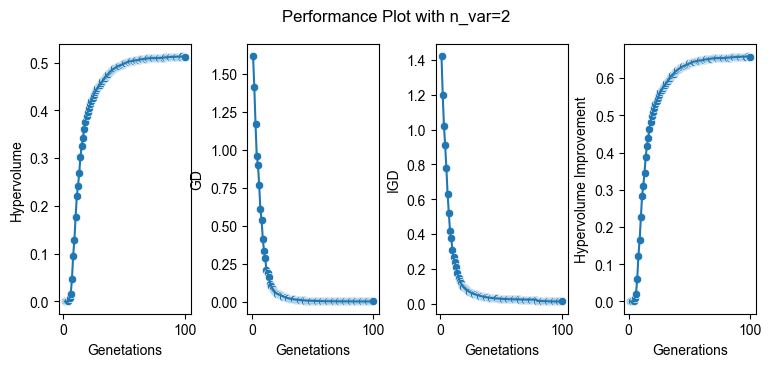

Max values of Hypervolume is 0.5127282157559956 
 , Best value of GD is 0.00349772348796632 
 , Best value of IGD is 
 0.013224151852949503 Best value of GD+ is 0.0018275500560596344 , Best value of IGD+ is 0.010423078038092169


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [9.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
fig.suptitle('Performance Plot with n_var=2')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

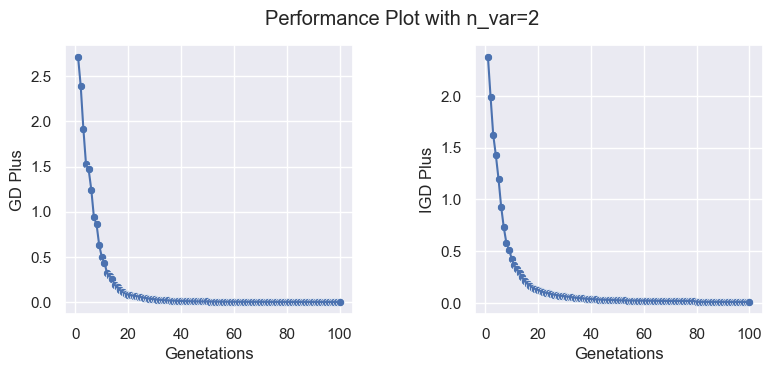

In [23]:
plt.rcParams["figure.figsize"] = [9.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)
fig.suptitle('Performance Plot with n_var=2')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
fig.suptitle('Performance Plot with n_var=2')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



Text(0, 0.5, 'Objective 2')

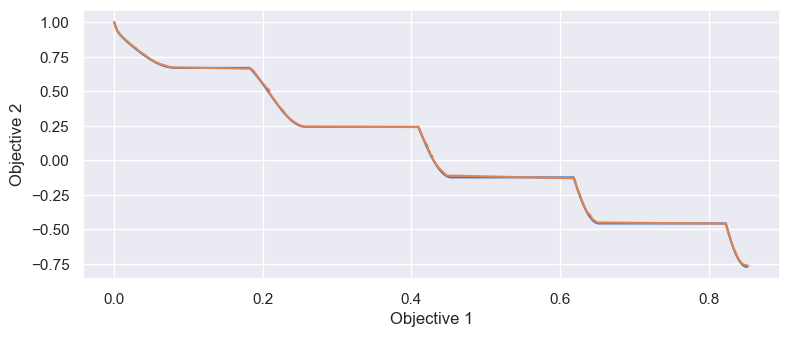

In [24]:
problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### SPEA2 nobj = 2 , nvar = 3

In [25]:
model_list = []
problem = ZDT3()
algorithm = SPEA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     15 |  1.3333742274 |  1.6603412398 |  0.000000E+00 |  2.8333636264 |  2.1474003170
     2 |      200 |     15 |  1.2299482469 |  1.5210320300 |  0.000000E+00 |  2.5386858906 |  2.0321308217
     3 |      300 |     11 |  0.9340056008 |  1.3130226808 |  0.000000E+00 |  2.1747160171 |  1.3680080990
     4 |      400 |     15 |  0.9061448366 |  1.1324574203 |  0.000000E+00 |  1.8231159373 |  1.3680080990
     5 |      500 |     16 |  0.6760541351 |  0.8693620808 |  0.000000E+00 |  1.3622731706 |  0.9059956666
     6 |      600 |     19 |  0.5772183338 |  0.8321428323 |  0.0003943982 |  1.3645774168 |  0.7953603981
     7 |      700 |     18 |  0.5256132380 |  0.6301904839 |  0.0412886294 |  0.9747450332 |  0.7376312923
     8 |      800 |     16 |  0.4824251744 |  0.5766343816 |  0.0453224989 |  0.8692298920 |  0.6562004227
     9 |      900 |     13 |  0.34668

In [26]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar3 for i in data_avg_hyp_improvement ]

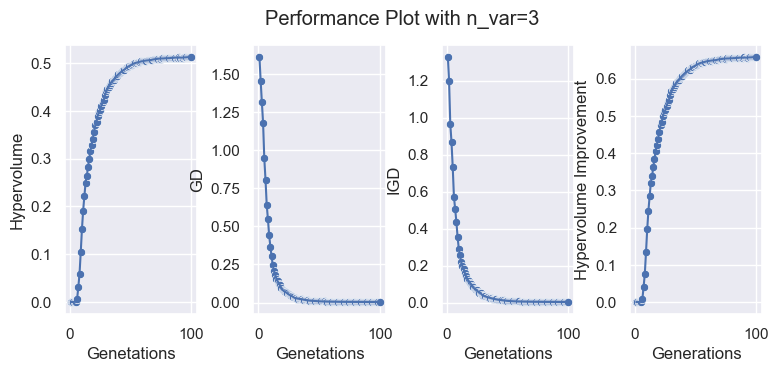

Max values of Hypervolume is 0.5124752264465717 
 , Best value of GD is 0.0038363802903258436 
 , Best value of IGD is 
 0.0036761056640289154 Best value of GD+ is 0.001979560647551512 , Best value of IGD+ is 0.0025384760904110446


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [9.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
fig.suptitle('Performance Plot with n_var=3')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')


plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

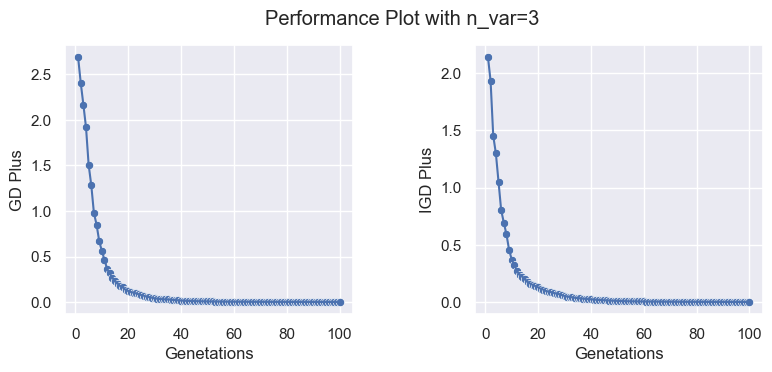

In [28]:
plt.rcParams["figure.figsize"] = [9.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)
fig.suptitle('Performance Plot with n_var=3')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')

Text(0, 0.5, 'Objective 2')

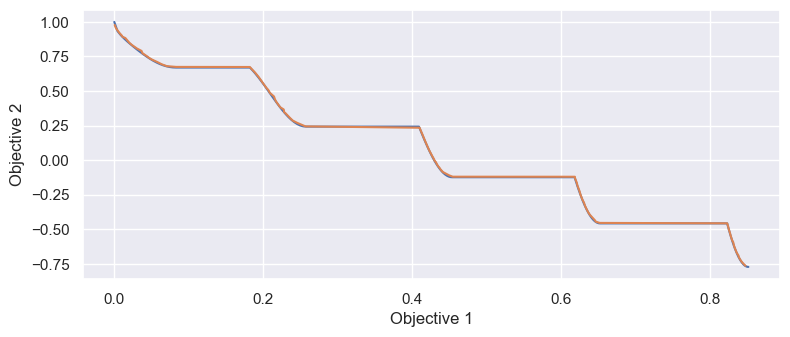

In [29]:
problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### SPEA2 nobj = 2 , nvar = 5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     13 |  1.3187526285 |  1.5613447168 |  0.000000E+00 |  2.5774545449 |  2.1357178526
     2 |      200 |     12 |  1.1838548932 |  1.4549731112 |  0.000000E+00 |  2.4649533311 |  1.9634831588
     3 |      300 |     16 |  0.9767447378 |  1.2620552214 |  0.000000E+00 |  2.0377825247 |  1.4636200225
     4 |      400 |     17 |  0.8597623295 |  1.1888703347 |  0.000000E+00 |  1.9756647032 |  1.3309632579
     5 |      500 |     18 |  0.5827904110 |  0.9889244337 |  0.0537554662 |  1.5883003673 |  0.7781459514
     6 |      600 |     18 |  0.5616651598 |  0.9242513191 |  0.0562051546 |  1.5278202600 |  0.7656205352
     7 |      700 |      8 |  0.5139000773 |  0.5545478457 |  0.0562051546 |  0.8360004448 |  0.7594179921
     8 |      800 |     14 |  0.3963365747 |  0.5386001395 |  0.1168735141 |  0.8477727853 |  0.5521194255
     9 |      900 |      7 |  0.35590

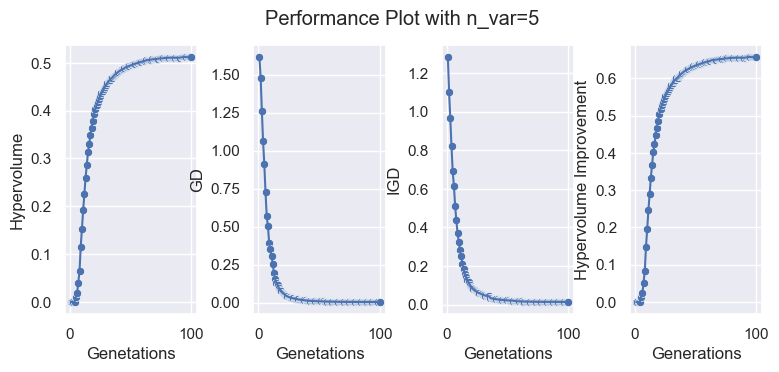

Max values of Hypervolume is 0.5121904737833629 
 , Best value of GD is 0.003780811368226074 
 , Best value of IGD is 
 0.013352033276130026 Best value of GD+ is 0.0018609253911926892 , Best value of IGD+ is 0.010631943477805196


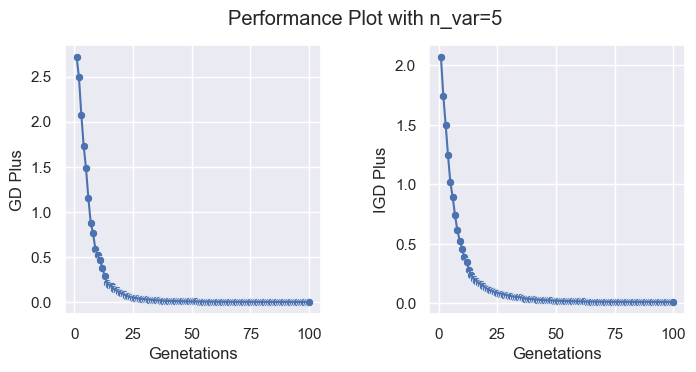

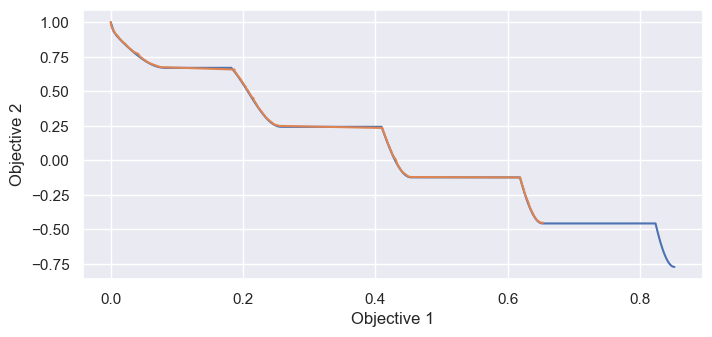

In [30]:
model_list = []
problem = ZDT3()
algorithm = SPEA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [9.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
fig.suptitle('Performance Plot with n_var=5')
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')

plt.show()

print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
fig.suptitle('Performance Plot with n_var=5')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()

problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### SPEA2 nobj = 2 , nvar = 10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     10 |  1.4143358695 |  1.5758383856 |  0.000000E+00 |  2.6514145395 |  2.4007812276
     2 |      200 |     13 |  1.1664840478 |  1.4025712312 |  0.000000E+00 |  2.3522559135 |  1.9254564449
     3 |      300 |     12 |  1.0464996367 |  1.2689983141 |  0.000000E+00 |  2.1012844997 |  1.7150112159
     4 |      400 |     12 |  0.7612894514 |  1.1353106644 |  0.000000E+00 |  1.8565737999 |  1.1018167917
     5 |      500 |     11 |  0.6084097450 |  1.0570866094 |  0.0030640899 |  1.7889059886 |  0.9018090150
     6 |      600 |     13 |  0.5645703877 |  0.8623139129 |  0.0051745180 |  1.4436169519 |  0.8316112254
     7 |      700 |     12 |  0.5027706692 |  0.6661645458 |  0.0281249272 |  1.0532859335 |  0.6987573360
     8 |      800 |     16 |  0.4212570869 |  0.5112842201 |  0.0771029496 |  0.7824292492 |  0.5816129604
     9 |      900 |     17 |  0.30403

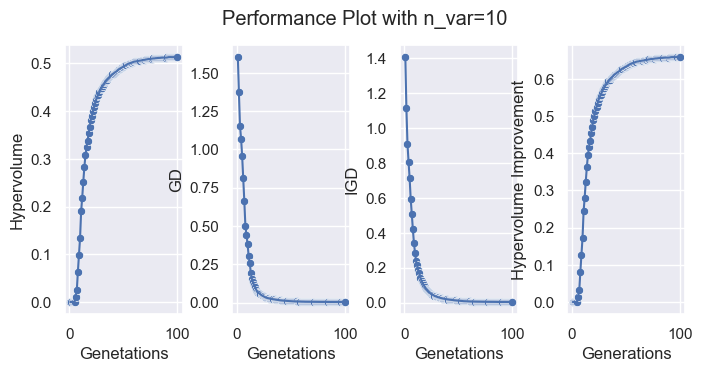

Max values of Hypervolume is 0.5131184799353345 
 , Best value of GD is 0.0037587730410123003 
 , Best value of IGD is 
 0.0035397744095709894 Best value of GD+ is 0.0020061758353947406 , Best value of IGD+ is 0.0024789363708894677


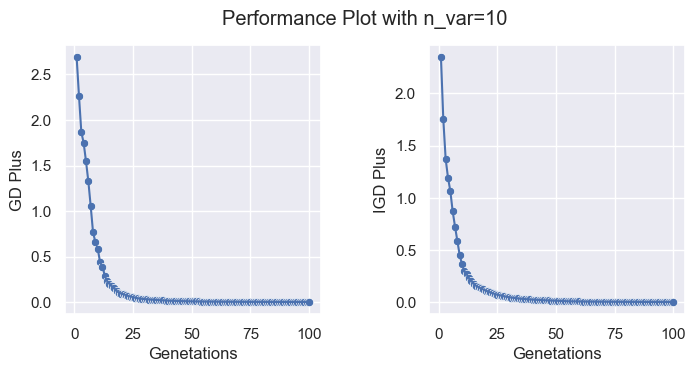

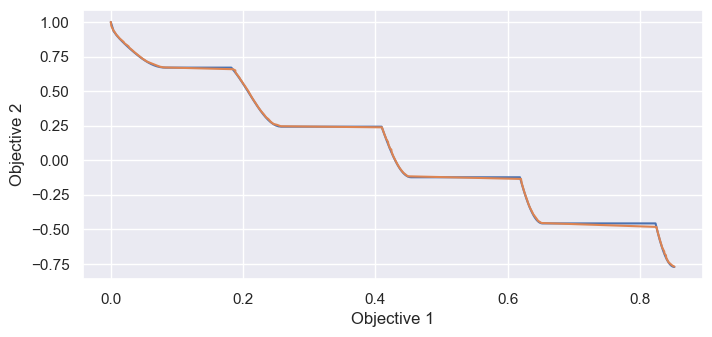

In [31]:
model_list = []
problem = ZDT3()
algorithm = SPEA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')



plt.show()

print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()

problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### NSGA2 nobj = 2 nvar = 2

In [34]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.multi.zdt import ZDT3
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = ZDT3()
algorithm = NSGA2(pop_size=100)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     15 |  1.3046483561 |  1.5301910684 |  0.000000E+00 |  2.4702757112 |  2.0831435338
     2 |      200 |     14 |  1.1732282301 |  1.5839299556 |  0.000000E+00 |  2.6447222316 |  1.8492926930
     3 |      300 |      8 |  0.7682114387 |  1.4199468654 |  0.0019023847 |  2.3862579716 |  1.0089558811
     4 |      400 |     11 |  0.7014058244 |  1.1652929281 |  0.0031340151 |  1.9507705767 |  0.9231886838
     5 |      500 |     10 |  0.5994618317 |  1.0149545681 |  0.0049391590 |  1.6244457731 |  0.8077305121
     6 |      600 |     10 |  0.5345265548 |  0.6999861453 |  0.0058738016 |  1.1313379725 |  0.7192470440
     7 |      700 |     13 |  0.5121888499 |  0.6197808588 |  0.0058738016 |  0.9492116415 |  0.7131015036
     8 |      800 |     20 |  0.4374300453 |  0.5764126457 |  0.0135488174 |  0.8615323661 |  0.5562952503
     9 |      900 |     18 |  0.35885

In [35]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar2 for i in data_avg_hyp_improvement ]





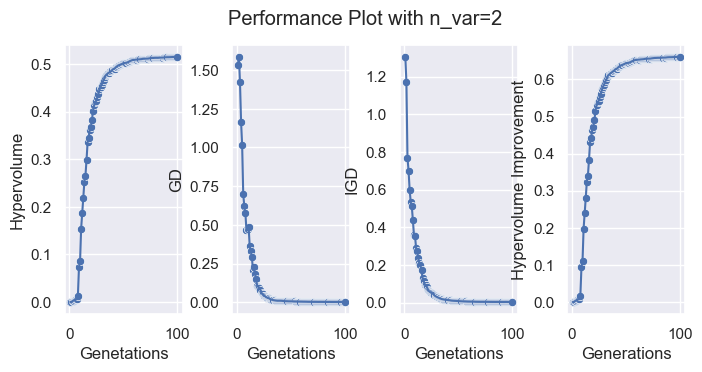

Max values of Hypervolume is 0.514576497549966 
 , Best value of GD is 0.003046048797675294 
 , Best value of IGD is 
 0.0029708129718329025 Best value of GD+ is 0.0014273337919760848 , Best value of IGD+ is 0.0017799512643294692


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
fig.suptitle('Performance Plot with n_var=2')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

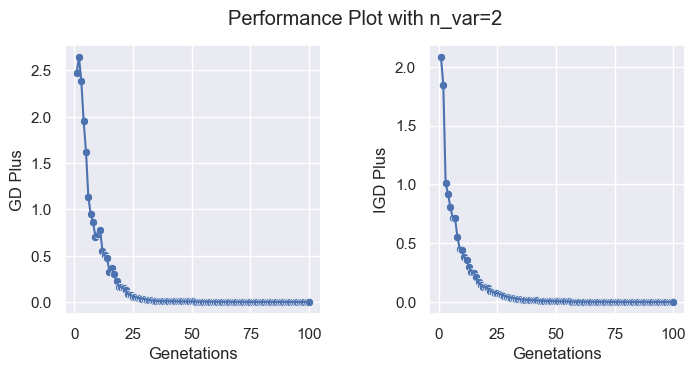

In [37]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)
fig.suptitle('Performance Plot with n_var=2')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



Text(0, 0.5, 'Objective 2')

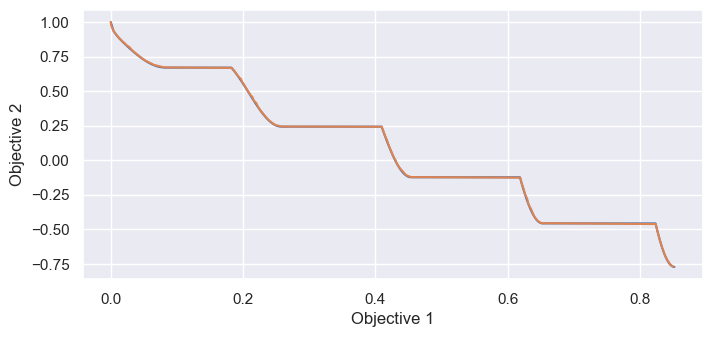

In [38]:
problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga2[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### NSGA2 nobj = 2 nvar = 3

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     15 |  1.3046483561 |  1.5301910684 |  0.000000E+00 |  2.4702757112 |  2.0831435338
     2 |      200 |     14 |  1.1732282301 |  1.5839299556 |  0.000000E+00 |  2.6447222316 |  1.8492926930
     3 |      300 |      8 |  0.7682114387 |  1.4199468654 |  0.0019023847 |  2.3862579716 |  1.0089558811
     4 |      400 |     11 |  0.7014058244 |  1.1652929281 |  0.0031340151 |  1.9507705767 |  0.9231886838
     5 |      500 |     10 |  0.5994618317 |  1.0149545681 |  0.0049391590 |  1.6244457731 |  0.8077305121
     6 |      600 |     10 |  0.5345265548 |  0.6999861453 |  0.0058738016 |  1.1313379725 |  0.7192470440
     7 |      700 |     13 |  0.5121888499 |  0.6197808588 |  0.0058738016 |  0.9492116415 |  0.7131015036
     8 |      800 |     20 |  0.4374300453 |  0.5764126457 |  0.0135488174 |  0.8615323661 |  0.5562952503
     9 |      900 |     18 |  0.35885

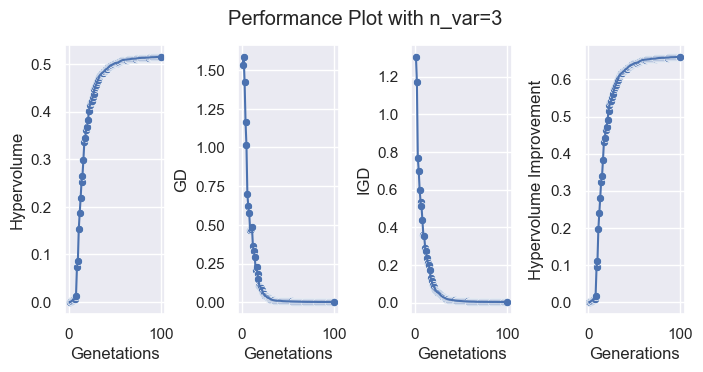

Max values of Hypervolume is 0.514576497549966 
 , Best value of GD is 0.003046048797675294 
 , Best value of IGD is 
 0.0029708129718329025 Best value of GD+ is 0.0014273337919760848 , Best value of IGD+ is 0.0017799512643294692


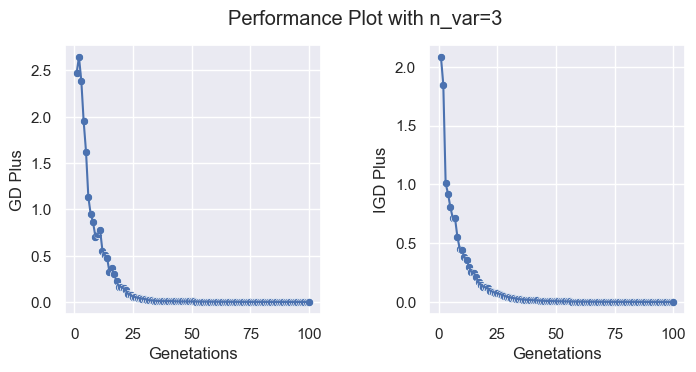

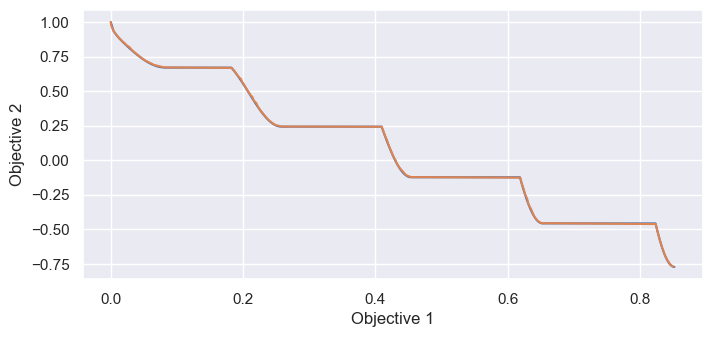

In [40]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = ZDT3()
algorithm = NSGA2(pop_size=100)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar3 for i in data_avg_hyp_improvement ]





import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
fig.suptitle('Performance Plot with n_var=3')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.725)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
fig.suptitle('Performance Plot with n_var=3')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()


problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga2[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### NSGA2 nobj  =2 nvar = 5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     15 |  1.3046483561 |  1.5301910684 |  0.000000E+00 |  2.4702757112 |  2.0831435338
     2 |      200 |     14 |  1.1732282301 |  1.5839299556 |  0.000000E+00 |  2.6447222316 |  1.8492926930
     3 |      300 |      8 |  0.7682114387 |  1.4199468654 |  0.0019023847 |  2.3862579716 |  1.0089558811
     4 |      400 |     11 |  0.7014058244 |  1.1652929281 |  0.0031340151 |  1.9507705767 |  0.9231886838
     5 |      500 |     10 |  0.5994618317 |  1.0149545681 |  0.0049391590 |  1.6244457731 |  0.8077305121
     6 |      600 |     10 |  0.5345265548 |  0.6999861453 |  0.0058738016 |  1.1313379725 |  0.7192470440
     7 |      700 |     13 |  0.5121888499 |  0.6197808588 |  0.0058738016 |  0.9492116415 |  0.7131015036
     8 |      800 |     20 |  0.4374300453 |  0.5764126457 |  0.0135488174 |  0.8615323661 |  0.5562952503
     9 |      900 |     18 |  0.35885

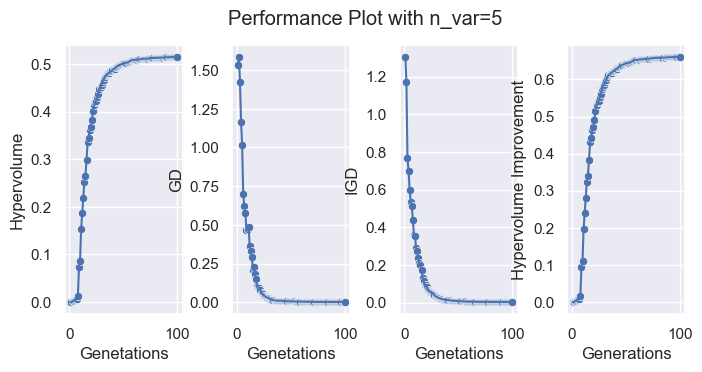

Max values of Hypervolume is 0.514576497549966 
 , Best value of GD is 0.003046048797675294 
 , Best value of IGD is 
 0.0029708129718329025 Best value of GD+ is 0.0014273337919760848 , Best value of IGD+ is 0.0017799512643294692


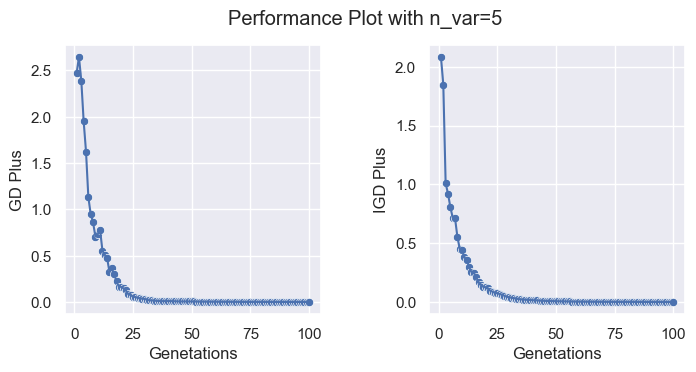

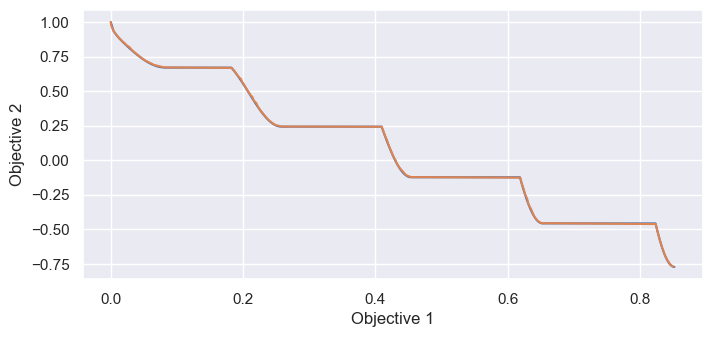

In [41]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = ZDT3()
algorithm = NSGA2(pop_size=100)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]





import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')


plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()


problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga2[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### NSGA2 nobj = 2 nvar = 10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     15 |  1.3046483561 |  1.5301910684 |  0.000000E+00 |  2.4702757112 |  2.0831435338
     2 |      200 |     14 |  1.1732282301 |  1.5839299556 |  0.000000E+00 |  2.6447222316 |  1.8492926930
     3 |      300 |      8 |  0.7682114387 |  1.4199468654 |  0.0019023847 |  2.3862579716 |  1.0089558811
     4 |      400 |     11 |  0.7014058244 |  1.1652929281 |  0.0031340151 |  1.9507705767 |  0.9231886838
     5 |      500 |     10 |  0.5994618317 |  1.0149545681 |  0.0049391590 |  1.6244457731 |  0.8077305121
     6 |      600 |     10 |  0.5345265548 |  0.6999861453 |  0.0058738016 |  1.1313379725 |  0.7192470440
     7 |      700 |     13 |  0.5121888499 |  0.6197808588 |  0.0058738016 |  0.9492116415 |  0.7131015036
     8 |      800 |     20 |  0.4374300453 |  0.5764126457 |  0.0135488174 |  0.8615323661 |  0.5562952503
     9 |      900 |     18 |  0.35885

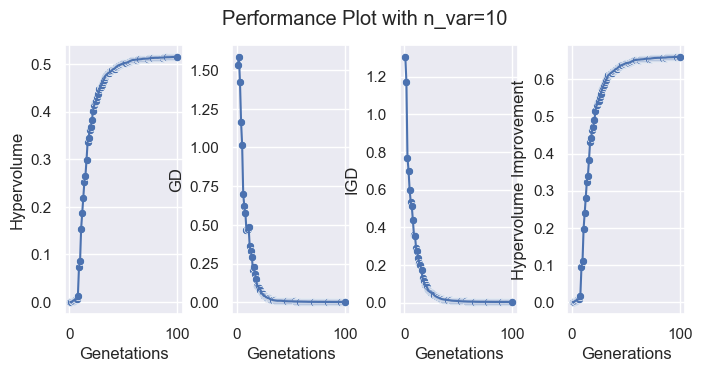

Max values of Hypervolume is 0.514576497549966 
 , Best value of GD is 0.003046048797675294 
 , Best value of IGD is 
 0.0029708129718329025 Best value of GD+ is 0.0014273337919760848 , Best value of IGD+ is 0.0017799512643294692


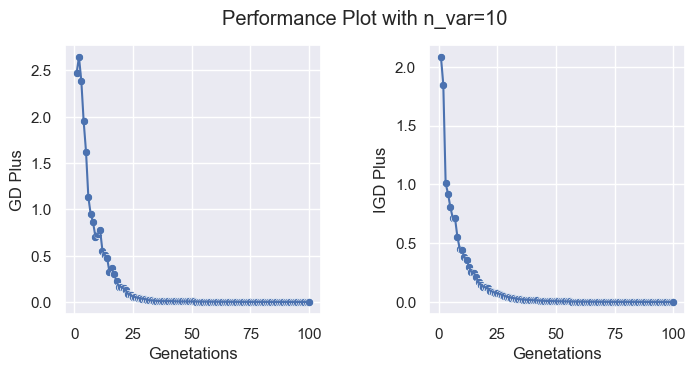

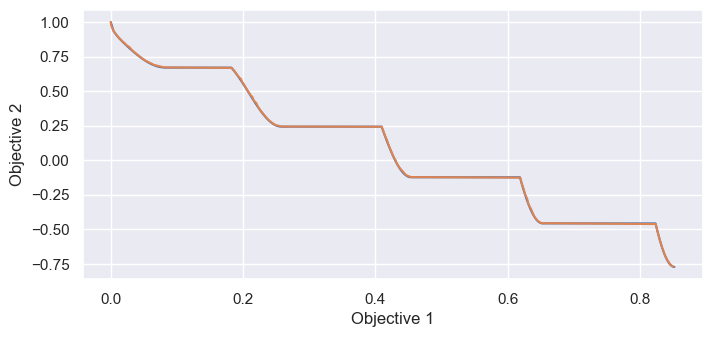

In [42]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = ZDT3()
algorithm = NSGA2(pop_size=100)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]




import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()


problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga2[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### MOEAD nobj = 2 , nvar = 2

In [43]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = ZDT3()
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=2,
               save_history = True,
               verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |      9 |  1.2923245391 |  1.4330662744 |  0.000000E+00 |  2.3858532784 |  2.1334530067
     2 |      200 |     29 |  0.9540347590 |  0.9001057354 |  0.000000E+00 |  1.4860269749 |  1.4012114466
     3 |      300 |     26 |  0.9153636271 |  0.7662394306 |  0.000000E+00 |  1.0608212807 |  1.3860961243
     4 |      400 |     45 |  0.6775525358 |  0.5121000143 |  0.0030574122 |  0.8049749711 |  1.0120699506
     5 |      500 |     33 |  0.6012046963 |  0.4408404783 |  0.0068201886 |  0.6507701204 |  0.8829604613
     6 |      600 |     67 |  0.6071474068 |  0.4808350199 |  0.0057026973 |  0.6554410373 |  0.9157817692
     7 |      700 |     85 |  0.4961709538 |  0.4258823620 |  0.0132259927 |  0.5287212367 |  0.7131975727
     8 |      800 |     39 |  0.4581053585 |  0.4132669818 |  0.0148972606 |  0.5569998040 |  0.6576766277
     9 |      900 |     60 |  0.43884

In [44]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_moead:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar2 for i in data_avg_hyp_improvement ]






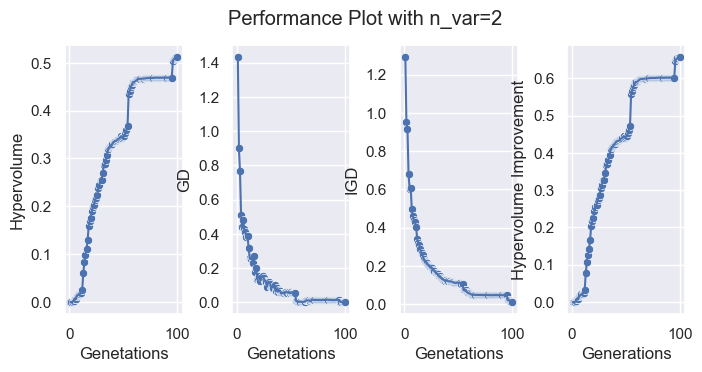

Max values of Hypervolume is 0.5120915863578157 
 , Best value of GD is 0.0024763835925268886 
 , Best value of IGD is 
 0.010398341207434967 Best value of GD+ is 0.0009084279422586977 , Best value of IGD+ is 0.0036339908055622165


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
fig.suptitle('Performance Plot with n_var=2')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

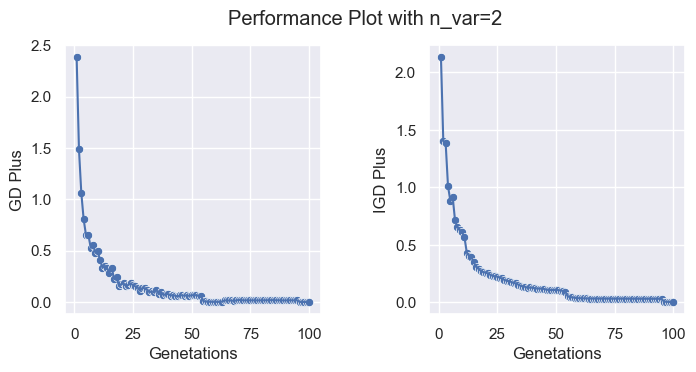

In [46]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
fig.suptitle('Performance Plot with n_var=2')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



Text(0, 0.5, 'Objective 2')

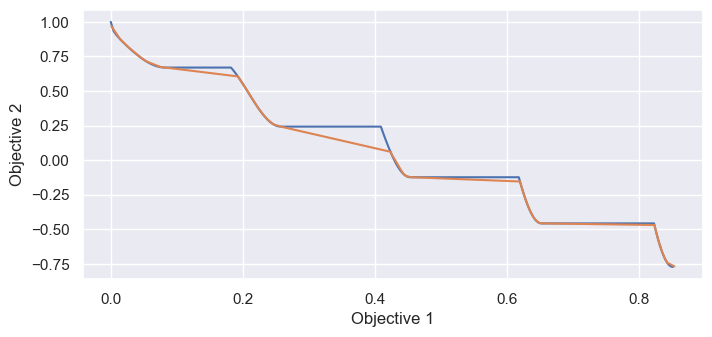

In [47]:
problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_moead[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### MOEAD nobj =2 nvars  = 3

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |      9 |  1.2923245391 |  1.4330662744 |  0.000000E+00 |  2.3858532784 |  2.1334530067
     2 |      200 |     29 |  0.9540347590 |  0.9001057354 |  0.000000E+00 |  1.4860269749 |  1.4012114466
     3 |      300 |     26 |  0.9153636271 |  0.7662394306 |  0.000000E+00 |  1.0608212807 |  1.3860961243
     4 |      400 |     45 |  0.6775525358 |  0.5121000143 |  0.0030574122 |  0.8049749711 |  1.0120699506
     5 |      500 |     33 |  0.6012046963 |  0.4408404783 |  0.0068201886 |  0.6507701204 |  0.8829604613
     6 |      600 |     67 |  0.6071474068 |  0.4808350199 |  0.0057026973 |  0.6554410373 |  0.9157817692
     7 |      700 |     85 |  0.4961709538 |  0.4258823620 |  0.0132259927 |  0.5287212367 |  0.7131975727
     8 |      800 |     39 |  0.4581053585 |  0.4132669818 |  0.0148972606 |  0.5569998040 |  0.6576766277
     9 |      900 |     60 |  0.43884

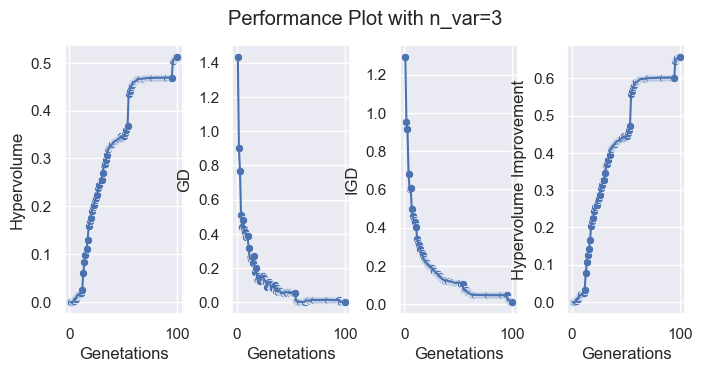

Max values of Hypervolume is 0.5120915863578157 
 , Best value of GD is 0.0024763835925268886 
 , Best value of IGD is 
 0.010398341207434967 Best value of GD+ is 0.0009084279422586977 , Best value of IGD+ is 0.0036339908055622165


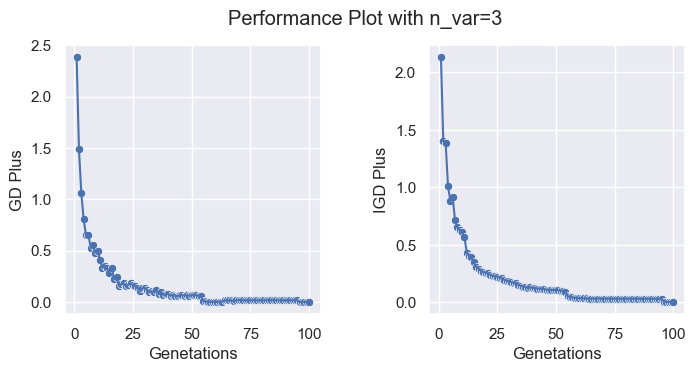

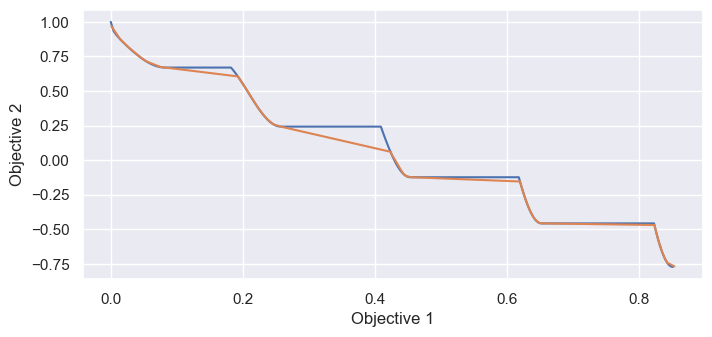

In [48]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = ZDT3()
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=2,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_moead:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar3 for i in data_avg_hyp_improvement ]


import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
sns.set_theme(style="darkgrid")
fig.suptitle('Performance Plot with n_var=3')
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')

plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
fig.suptitle('Performance Plot with n_var=3')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()


problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_moead[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### MOEAD nobj = 2 nvars = 5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |      9 |  1.2923245391 |  1.4330662744 |  0.000000E+00 |  2.3858532784 |  2.1334530067
     2 |      200 |     29 |  0.9540347590 |  0.9001057354 |  0.000000E+00 |  1.4860269749 |  1.4012114466
     3 |      300 |     26 |  0.9153636271 |  0.7662394306 |  0.000000E+00 |  1.0608212807 |  1.3860961243
     4 |      400 |     45 |  0.6775525358 |  0.5121000143 |  0.0030574122 |  0.8049749711 |  1.0120699506
     5 |      500 |     33 |  0.6012046963 |  0.4408404783 |  0.0068201886 |  0.6507701204 |  0.8829604613
     6 |      600 |     67 |  0.6071474068 |  0.4808350199 |  0.0057026973 |  0.6554410373 |  0.9157817692
     7 |      700 |     85 |  0.4961709538 |  0.4258823620 |  0.0132259927 |  0.5287212367 |  0.7131975727
     8 |      800 |     39 |  0.4581053585 |  0.4132669818 |  0.0148972606 |  0.5569998040 |  0.6576766277
     9 |      900 |     60 |  0.43884

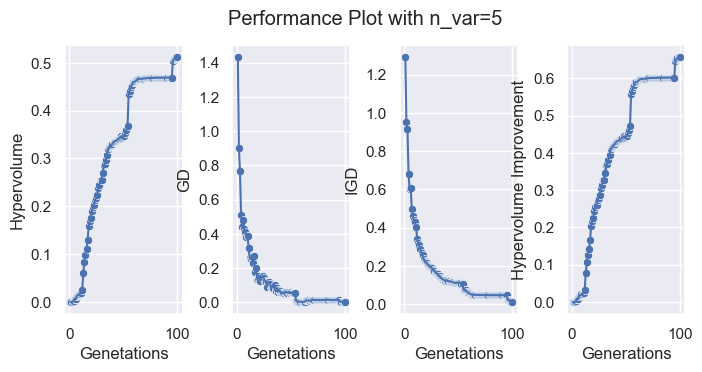

Max values of Hypervolume is 0.5120915863578157 
 , Best value of GD is 0.0024763835925268886 
 , Best value of IGD is 
 0.010398341207434967 Best value of GD+ is 0.0009084279422586977 , Best value of IGD+ is 0.0036339908055622165


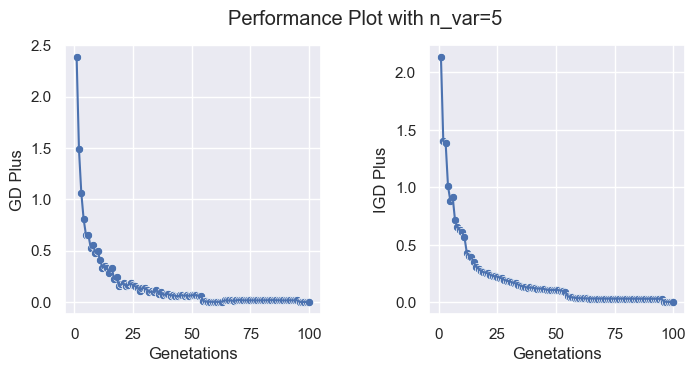

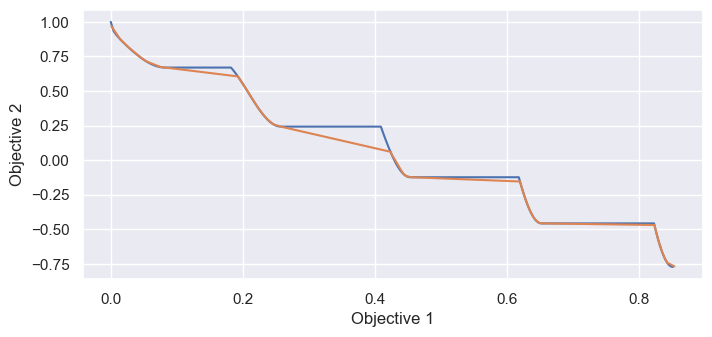

In [49]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = ZDT3()
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=2,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_moead:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]




import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
sns.set_theme(style="darkgrid")
fig.suptitle('Performance Plot with n_var=5')
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
fig.suptitle('Performance Plot with n_var=5')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()

problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_moead[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### MOEAD nobjs = 2, nvars = 10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |      9 |  1.2923245391 |  1.4330662744 |  0.000000E+00 |  2.3858532784 |  2.1334530067
     2 |      200 |     29 |  0.9540347590 |  0.9001057354 |  0.000000E+00 |  1.4860269749 |  1.4012114466
     3 |      300 |     26 |  0.9153636271 |  0.7662394306 |  0.000000E+00 |  1.0608212807 |  1.3860961243
     4 |      400 |     45 |  0.6775525358 |  0.5121000143 |  0.0030574122 |  0.8049749711 |  1.0120699506
     5 |      500 |     33 |  0.6012046963 |  0.4408404783 |  0.0068201886 |  0.6507701204 |  0.8829604613
     6 |      600 |     67 |  0.6071474068 |  0.4808350199 |  0.0057026973 |  0.6554410373 |  0.9157817692
     7 |      700 |     85 |  0.4961709538 |  0.4258823620 |  0.0132259927 |  0.5287212367 |  0.7131975727
     8 |      800 |     39 |  0.4581053585 |  0.4132669818 |  0.0148972606 |  0.5569998040 |  0.6576766277
     9 |      900 |     60 |  0.43884

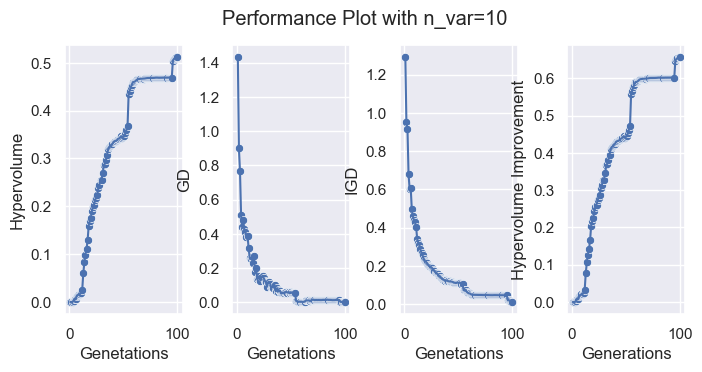

Max values of Hypervolume is 0.5120915863578157 
 , Best value of GD is 0.0024763835925268886 
 , Best value of IGD is 
 0.010398341207434967 Best value of GD+ is 0.0009084279422586977 , Best value of IGD+ is 0.0036339908055622165


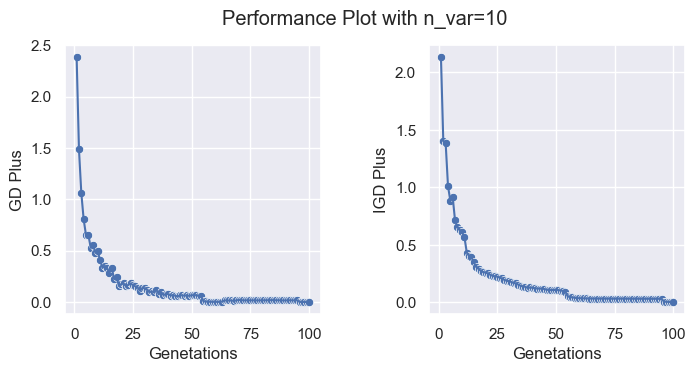

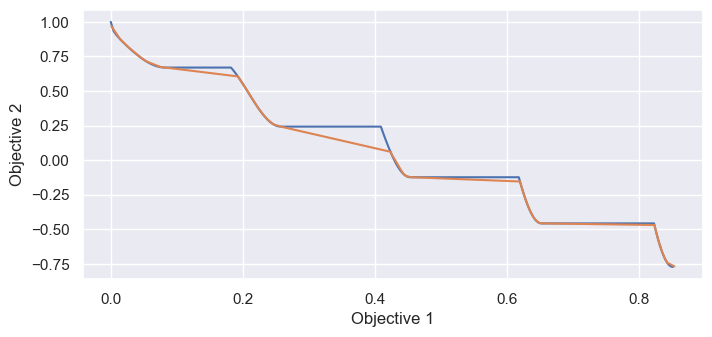

In [50]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = ZDT3()
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=2,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_moead:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]




import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
sns.set_theme(style="darkgrid")
fig.suptitle('Performance Plot with n_var=10')
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)

fig.suptitle('Performance Plot with n_var=10')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()


problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_moead[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### NSGA3 nobj = 2 nvars = 2

In [51]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = ZDT3()
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     12 |  1.3046483561 |  1.5655749978 |  0.000000E+00 |  2.5281579982 |  2.0831435338
     2 |      200 |      7 |  1.2355494171 |  1.4542633297 |  0.000000E+00 |  2.4494909154 |  1.9938984617
     3 |      300 |      9 |  1.2211017780 |  1.3561668631 |  0.000000E+00 |  2.2578833299 |  1.9938984617
     4 |      400 |     11 |  1.0444411698 |  1.2281840321 |  0.000000E+00 |  2.0257841350 |  1.6650980549
     5 |      500 |      8 |  1.0052659164 |  1.0672427641 |  0.000000E+00 |  1.6265263899 |  1.6500059434
     6 |      600 |      8 |  0.8159574288 |  0.8192647259 |  0.000000E+00 |  1.2804174915 |  1.2416615807
     7 |      700 |      6 |  0.8015820475 |  0.7403450418 |  0.000000E+00 |  1.0164327661 |  1.2285794240
     8 |      800 |     10 |  0.5949341953 |  0.6218122026 |  0.0273321403 |  0.9417432462 |  0.9001161032
     9 |      900 |      7 |  0.53482

In [52]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga3:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar2 for i in data_avg_hyp_improvement ]


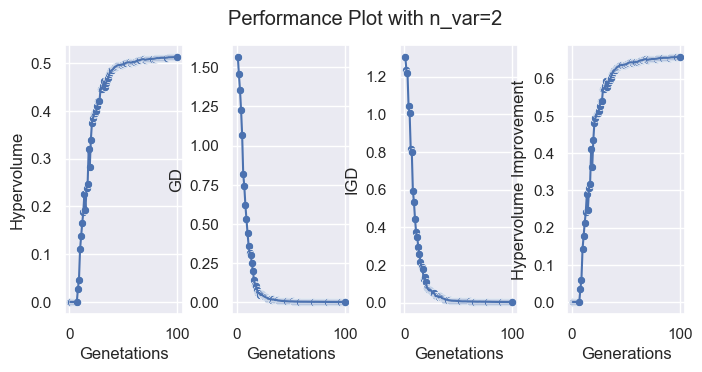

Max values of Hypervolume is 0.5128369943263912 
 , Best value of GD is 0.0028572413436155865 
 , Best value of IGD is 
 0.0038079986411965706 Best value of GD+ is 0.0015355876293117426 , Best value of IGD+ is 0.0023106916532070827


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
fig.suptitle('Performance Plot with n_var=2')
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')


plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

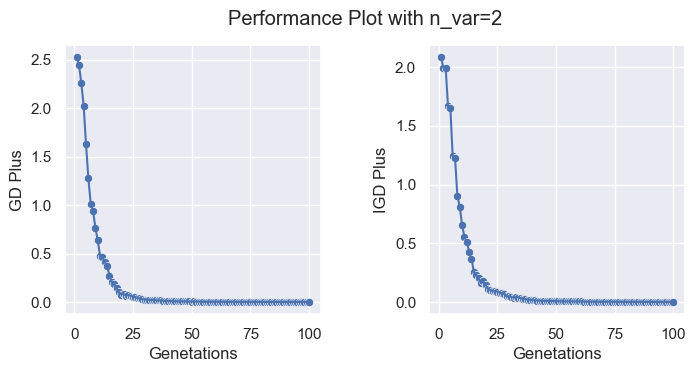

In [54]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
fig.suptitle('Performance Plot with n_var=2')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



Text(0, 0.5, 'Objective 2')

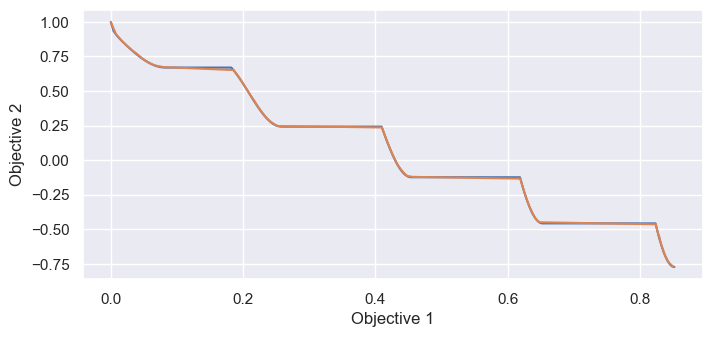

In [55]:
problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga3[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### NSGA3 nobj = 2 , nvars  = 3

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     12 |  1.3046483561 |  1.5655749978 |  0.000000E+00 |  2.5281579982 |  2.0831435338
     2 |      200 |      7 |  1.2355494171 |  1.4542633297 |  0.000000E+00 |  2.4494909154 |  1.9938984617
     3 |      300 |      9 |  1.2211017780 |  1.3561668631 |  0.000000E+00 |  2.2578833299 |  1.9938984617
     4 |      400 |     11 |  1.0444411698 |  1.2281840321 |  0.000000E+00 |  2.0257841350 |  1.6650980549
     5 |      500 |      8 |  1.0052659164 |  1.0672427641 |  0.000000E+00 |  1.6265263899 |  1.6500059434
     6 |      600 |      8 |  0.8159574288 |  0.8192647259 |  0.000000E+00 |  1.2804174915 |  1.2416615807
     7 |      700 |      6 |  0.8015820475 |  0.7403450418 |  0.000000E+00 |  1.0164327661 |  1.2285794240
     8 |      800 |     10 |  0.5949341953 |  0.6218122026 |  0.0273321403 |  0.9417432462 |  0.9001161032
     9 |      900 |      7 |  0.53482

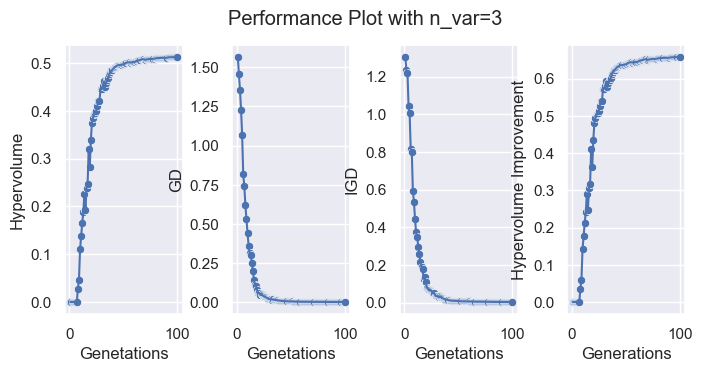

Max values of Hypervolume is 0.5128369943263912 
 , Best value of GD is 0.0028572413436155865 
 , Best value of IGD is 
 0.0038079986411965706 Best value of GD+ is 0.0015355876293117426 , Best value of IGD+ is 0.0023106916532070827


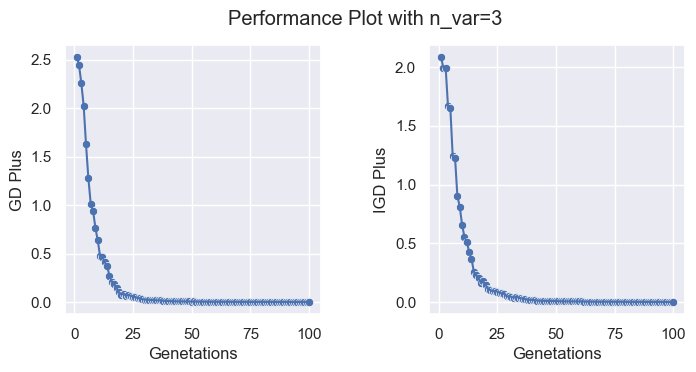

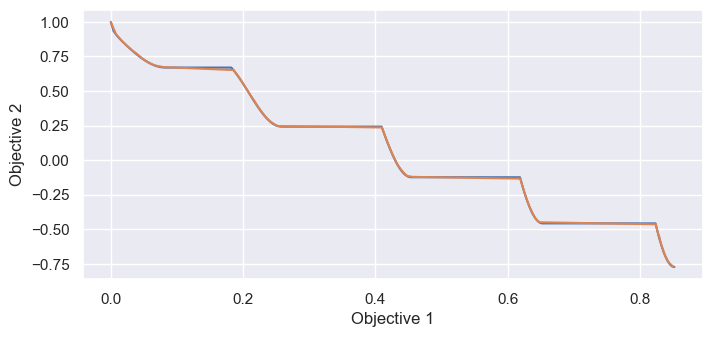

In [56]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = ZDT3()
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga3:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar3 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
fig.suptitle('Performance Plot with n_var=3')
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')

plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
fig.suptitle('Performance Plot with n_var=3')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')
sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()


problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga3[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### NSGA3 nobj = 2 , nvars = 5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     12 |  1.3046483561 |  1.5655749978 |  0.000000E+00 |  2.5281579982 |  2.0831435338
     2 |      200 |      7 |  1.2355494171 |  1.4542633297 |  0.000000E+00 |  2.4494909154 |  1.9938984617
     3 |      300 |      9 |  1.2211017780 |  1.3561668631 |  0.000000E+00 |  2.2578833299 |  1.9938984617
     4 |      400 |     11 |  1.0444411698 |  1.2281840321 |  0.000000E+00 |  2.0257841350 |  1.6650980549
     5 |      500 |      8 |  1.0052659164 |  1.0672427641 |  0.000000E+00 |  1.6265263899 |  1.6500059434
     6 |      600 |      8 |  0.8159574288 |  0.8192647259 |  0.000000E+00 |  1.2804174915 |  1.2416615807
     7 |      700 |      6 |  0.8015820475 |  0.7403450418 |  0.000000E+00 |  1.0164327661 |  1.2285794240
     8 |      800 |     10 |  0.5949341953 |  0.6218122026 |  0.0273321403 |  0.9417432462 |  0.9001161032
     9 |      900 |      7 |  0.53482

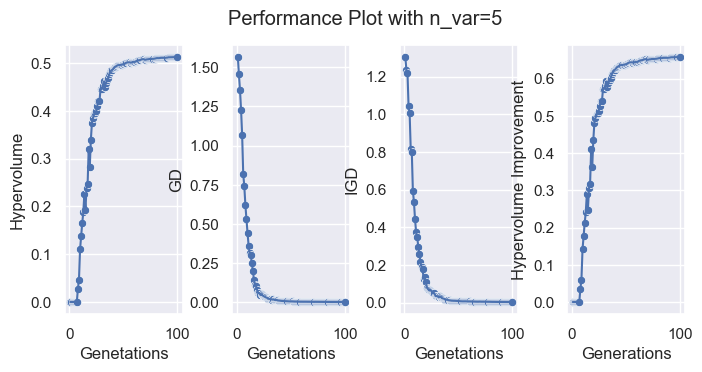

Max values of Hypervolume is 0.5128369943263912 
 , Best value of GD is 0.0028572413436155865 
 , Best value of IGD is 
 0.0038079986411965706 Best value of GD+ is 0.0015355876293117426 , Best value of IGD+ is 0.0023106916532070827


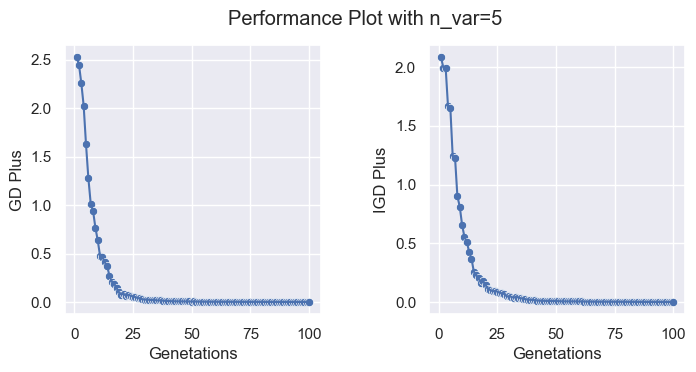

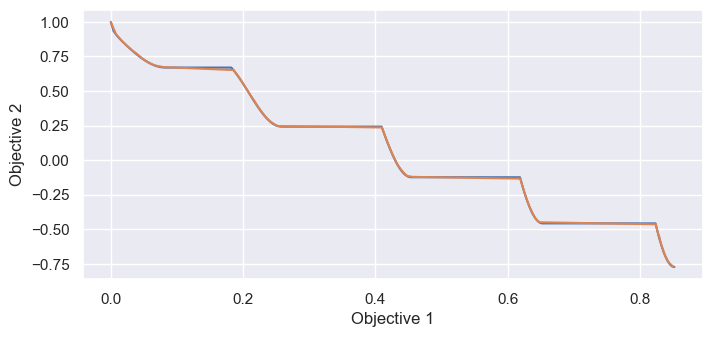

In [57]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = ZDT3()
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga3:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]


import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
sns.set_theme(style="darkgrid")
fig.suptitle('Performance Plot with n_var=5')
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')


plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
fig.suptitle('Performance Plot with n_var=5')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')
sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()

problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga3[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### NSGA3 nobj = 2 nvars = 10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     12 |  1.3046483561 |  1.5655749978 |  0.000000E+00 |  2.5281579982 |  2.0831435338
     2 |      200 |      7 |  1.2355494171 |  1.4542633297 |  0.000000E+00 |  2.4494909154 |  1.9938984617
     3 |      300 |      9 |  1.2211017780 |  1.3561668631 |  0.000000E+00 |  2.2578833299 |  1.9938984617
     4 |      400 |     11 |  1.0444411698 |  1.2281840321 |  0.000000E+00 |  2.0257841350 |  1.6650980549
     5 |      500 |      8 |  1.0052659164 |  1.0672427641 |  0.000000E+00 |  1.6265263899 |  1.6500059434
     6 |      600 |      8 |  0.8159574288 |  0.8192647259 |  0.000000E+00 |  1.2804174915 |  1.2416615807
     7 |      700 |      6 |  0.8015820475 |  0.7403450418 |  0.000000E+00 |  1.0164327661 |  1.2285794240
     8 |      800 |     10 |  0.5949341953 |  0.6218122026 |  0.0273321403 |  0.9417432462 |  0.9001161032
     9 |      900 |      7 |  0.53482

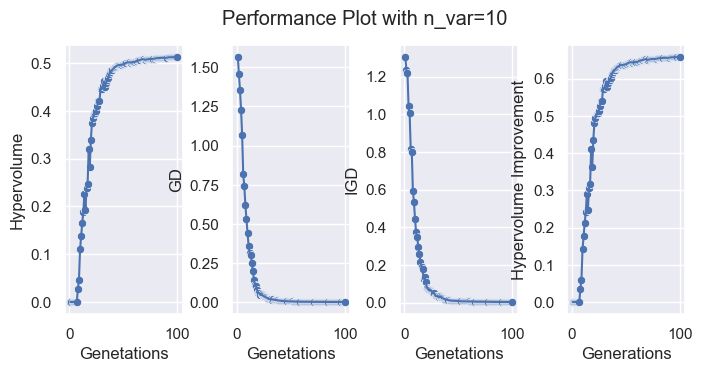

Max values of Hypervolume is 0.5128369943263912 
 , Best value of GD is 0.0028572413436155865 
 , Best value of IGD is 
 0.0038079986411965706 Best value of GD+ is 0.0015355876293117426 , Best value of IGD+ is 0.0023106916532070827


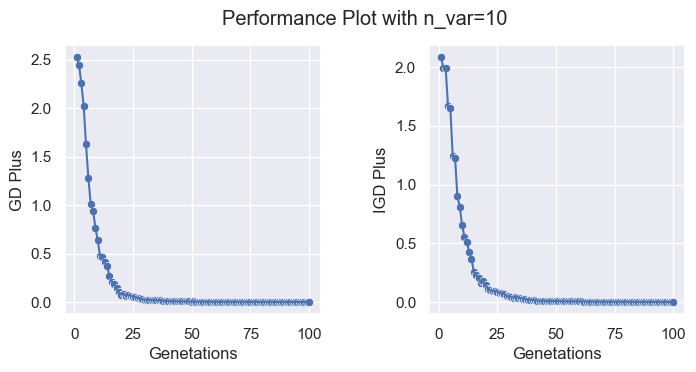

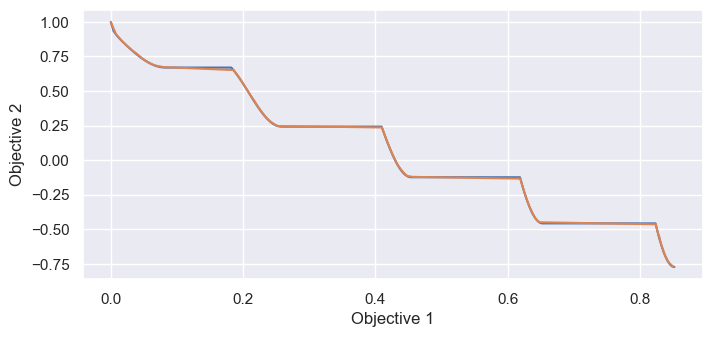

In [58]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = ZDT3()
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga3:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]


import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
sns.set_theme(style="darkgrid")
fig.suptitle('Performance Plot with n_var=10')
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')

plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)

fig.suptitle('Performance Plot with n_var=10')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')
sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()


problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga3[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()